<a href="https://colab.research.google.com/github/BhavyaGoyal777/NLP/blob/main/LLMvsHUMANClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
!pip install kaggle

In [ ]:
# !kaggle datasets download -d starblasters8/human-vs-llm-text-corpus

In [ ]:
# !unzip human-vs-llm-text-corpus.zip


In [ ]:
df=pd.read_csv('data.csv')
df1=pd.read_csv('distribution.csv')

In [ ]:
df.head()

,text,source,prompt_id,text_length,word_count
0,"Federal law supersedes state law, and cannabis...",Bloom-7B,0,967,157
1,Miles feels restless after working all day. He...,Bloom-7B,0,5068,778
2,So first of I am danish. That means that I fol...,Bloom-7B,0,1602,267
3,In this paper we present a novel rule-based ap...,Bloom-7B,0,5469,848
4,"Most social progressives, love democracy, and ...",Bloom-7B,0,2379,380


In [ ]:
df['prompt_id'].value_counts()



prompt_id
0       598018
1        14221
2         8251
3         7287
4         5620
         ...  
9856         1
9870         1
9862         1
9816         1
9838         1
Name: count, Length: 9914, dtype: int64

In [ ]:
df=df.drop(['prompt_id','text_length','word_count'],axis=1)

In [ ]:
df.head()

,text,source
0,"Federal law supersedes state law, and cannabis...",Bloom-7B
1,Miles feels restless after working all day. He...,Bloom-7B
2,So first of I am danish. That means that I fol...,Bloom-7B
3,In this paper we present a novel rule-based ap...,Bloom-7B
4,"Most social progressives, love democracy, and ...",Bloom-7B


In [ ]:
df1.head()

,Source,Number of Samples,Percentage of Total Data,Text Length Sum,Text Length Mean,Text Length Median,Text Length Std,Text Length Max,Text Length Min,Word Count Sum,Word Count Mean,Word Count Median,Word Count Std,Word Count Max,Word Count Min
0,Human,347692,44.0718%,1555649148,4474.216,2288.0,6989.088,890119,110,246977688,710.335,396.0,1003.481,71543,25
1,GPT-3.5,52346,6.6351%,147829489,2824.084,3290.0,1797.105,23940,116,22633379,432.380,505.0,263.848,3565,25
2,Text-Davinci-003,22860,2.8976%,21012437,919.179,727.0,590.805,5313,116,3584391,156.798,121.0,98.634,822,25
3,Text-Davinci-002,21436,2.7171%,19447200,907.221,591.0,947.377,6100,105,3414594,159.292,107.0,160.207,934,25
4,OPT-1.3B,18467,2.3408%,27468056,1487.413,777.0,1549.101,6521,114,4636050,251.045,133.0,256.684,960,25


In [ ]:
df['source'] = df['source'].where(df['source'] == 'Human', 'LLM')

In [ ]:
df.head()

,text,source
0,"Federal law supersedes state law, and cannabis...",LLM
1,Miles feels restless after working all day. He...,LLM
2,So first of I am danish. That means that I fol...,LLM
3,In this paper we present a novel rule-based ap...,LLM
4,"Most social progressives, love democracy, and ...",LLM


In [ ]:
df['words_per_text']=df['text'].str.split().apply(len)

In [ ]:
df.head()

,text,source,words_per_text
0,"Federal law supersedes state law, and cannabis...",LLM,157
1,Miles feels restless after working all day. He...,LLM,778
2,So first of I am danish. That means that I fol...,LLM,267
3,In this paper we present a novel rule-based ap...,LLM,848
4,"Most social progressives, love democracy, and ...",LLM,380


In [ ]:
label_1_dataset = df[df['source'] == 'LLM']

In [ ]:
label_0_dataset = df[df['source'] == 'Human']

In [ ]:
from random import shuffle
shuffled_label_1_dataset = label_1_dataset.sample(frac=1, random_state=42)
shuffled_label_0_dataset = label_0_dataset.sample(frac=1, random_state=42)
shuffled_label_1_dataset.shape

(441230, 3)

In [ ]:
reduced_label_1 = shuffled_label_1_dataset.sample(n=50000, random_state=42).reset_index(drop=True)
reduced_label_0 = shuffled_label_0_dataset.sample(n=50000, random_state=42).reset_index(drop=True)

In [ ]:
df=pd.concat([reduced_label_1,reduced_label_0],axis=0)

In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [ ]:
model_name='roberta-base'
tokenizer=AutoTokenizer.from_pretrained(model_name)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
text="I am alex "

In [ ]:
tokenizer(text)

{'input_ids': [0, 100, 524, 10, 14726, 1437, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [ ]:
from sklearn.model_selection import train_test_split
train,val=train_test_split(df,test_size=0.2,random_state=42)
val,test=train_test_split(val,test_size=0.5,random_state=42)

In [ ]:
train.shape,val.shape,test.shape

((80000, 3), (10000, 3), (10000, 3))

In [ ]:
df.head()

,text,source,words_per_text
25721,"It's called Taylor Ham, otherwise known as Por...",Human,570
30184,"""Why does this computer not work?"" asked my co...",Human,1030
19864,"Richard Wright's ""Native Son"" and Toni Morriso...",LLM,529
26699,Bullying on Social Media Platforms Essay\n\nTa...,Human,1544
42991,Punishable Omissions in the Criminal Law Essay...,Human,678


In [ ]:
# Define the function to add a label column
def add_label_column(df, class_column):
    # Mapping dictionary for class labels to numeric labels
    label_mapping = {
        'Human': 0,
        'LLM': 1,

    }

    # Add a new column 'label' based on the mapping
    df['label'] = df[class_column].map(label_mapping)

    return df


In [ ]:
add_label_column(train,'source')
add_label_column(val,'source')
add_label_column(test,'source')

,text,source,words_per_text,label
20175,"The PRI is set to win about 30, with the conse...",LLM,666,1
23647,"Essay: Okay, I have to admit that this sounds ...",Human,279,0
30464,Online Discussion and Violence Program Evaluat...,Human,667,0
49858,Criminal justice Essay\n\nTable of Contents\n ...,Human,2603,0
2825,Dear Senator \n\nThank you for taking the tim...,LLM,201,1
...,...,...,...,...
46743,"These years included what was called ""spectacu...",Human,111,0
29853,Software developers have discovered references...,LLM,53,1
23620,Saudi Aramco Company’s Engineering Innovation ...,Human,4059,0
31440,Social media has become an integral part of th...,LLM,596,1


In [ ]:

train.head()

,text,source,words_per_text,label
22822,"Dear coffee..... How I love you so, every day ...",Human,146,0
45560,"It's Persian for ""land."" Hence, ""Land of the A...",LLM,70,1
27615,The place stinks of smoke like when it was the...,LLM,118,1
5173,"The old rusted car sat in the field, overgrow...",LLM,404,1
18100,Receives Major Update In a major update for Fa...,LLM,90,1


In [ ]:
from datasets import Dataset,DatasetDict
dataset=DatasetDict(
    {
    'train':Dataset.from_pandas(train,preserve_index=False),
    'val':Dataset.from_pandas(val,preserve_index=False),
    'test':Dataset.from_pandas(test,preserve_index=False)
    }
)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'source', 'words_per_text', 'label'],
        num_rows: 80000
    })
    val: Dataset({
        features: ['text', 'source', 'words_per_text', 'label'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'source', 'words_per_text', 'label'],
        num_rows: 10000
    })
})

In [ ]:
def tokenize(batch):
  return tokenizer(batch['text'],padding=True,truncation=True)


In [ ]:
text_encoded=dataset.map(tokenize,batched=True,batch_size=64)

Map:   0%|          | 0/80000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
text_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'source', 'words_per_text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 80000
    })
    val: Dataset({
        features: ['text', 'source', 'words_per_text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'source', 'words_per_text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10000
    })
})

In [ ]:
label2id={'Human':0,'LLM':1}
id2label={0:'Human',1:'LLM'}

In [ ]:
from transformers import AutoModel
import torch
model=AutoModel.from_pretrained(model_name)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

model.config

RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.45.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

In [ ]:
from transformers import AutoModelForSequenceClassification,AutoConfig
Num_labels=len(label2id)
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config=AutoConfig.from_pretrained(model_name,num_labels=Num_labels,id2label=id2label,label2id=label2id)

model=AutoModelForSequenceClassification.from_pretrained(model_name,config=config).to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config.label2id

{'Human': 0, 'LLM': 1}

In [ ]:
model.config

RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Human",
    "1": "LLM"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Human": 0,
    "LLM": 1
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.45.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

In [ ]:
from transformers import TrainingArguments
batch_size=64
num_epochs=4
lr=5e-5
training_dir='robert_train_dir'
training_args=TrainingArguments(
    output_dir=training_dir,
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    overwrite_output_dir=True,
    weight_decay=0.1,
    evaluation_strategy='epoch',


)


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
!pip install evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
import evaluate
import numpy as np
metric=evaluate.load('accuracy')


def compute_metrics(eval_pred):
  logits,labels=eval_pred
  predictions=np.argmax(logits,axis=1)
  return metric.compute(predictions=predictions,references=labels)

In [ ]:
from transformers import Trainer
trainer=Trainer(model=model,
                compute_metrics=compute_metrics,
                args=training_args,
                train_dataset=text_encoded['train'],
                eval_dataset=text_encoded['val'],
                tokenizer=tokenizer
                )

In [ ]:
tokenizer

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [ ]:

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.130100,0.122356,0.957100
2,0.068700,0.313371,0.926000
3,0.034100,0.268399,0.941700
4,0.012800,0.294890,0.948900


TrainOutput(global_step=5000, training_loss=0.07142663631439208, metrics={'train_runtime': 12801.8686, 'train_samples_per_second': 24.996, 'train_steps_per_second': 0.391, 'total_flos': 8.41955377152e+16, 'train_loss': 0.07142663631439208, 'epoch': 4.0})

In [ ]:
preds_output=trainer.predict(text_encoded['test'])

In [ ]:
preds_output.metrics

{'test_loss': 0.31975865364074707,
 'test_accuracy': 0.9463,
 'test_runtime': 135.313,
 'test_samples_per_second': 73.903,
 'test_steps_per_second': 1.16}

In [ ]:
y_pred=np.argmax(preds_output.predictions,axis=1)
y_test=text_encoded['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      5059
           1       0.91      0.99      0.95      4941

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

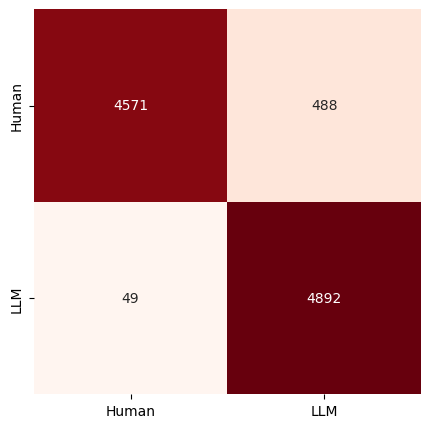

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,xticklabels=label2id.keys(),yticklabels=label2id.keys(),fmt='d',cbar=False,cmap='Reds')



In [ ]:
LLM_text='''
The explosion of visual data on the internet is driven by the proliferation of sensors, such as smartphones and cameras,
leading to more sensors than people on Earth. This vast amount of pixel data is often referred to as the "dark matter of
the internet" because it constitutes a significant portion of online content yet is difficult to analyze and understand.
For instance, over 150 hours of video are uploaded to YouTube every minute, highlighting the challenges in harnessing this
information. The complexity of visual data makes it one of the hardest types to work with, necessitating advanced techniques
for effective analysis.
'''

human_text='''
There is more seats on the side for people walking in late.
So just to make sure you are in CS231n The deep learning on
neural network class for visual recognition Anybody in the wrong
class? Okay, good. Alright, so welcome and happy new year, happy
first day of the winter break the second offering of this class
when we have literally doubled our enrollment and from a hundred
eighty people last time we offered to about 350 of yo
u signed up just a couple of words to do to make us all legally covered we are
'''
human_text2='''

is because of the explosion of both the
internet as a carrier of data as well as
sensors we have more sensors than the number
of people on earth these days every one of you
is carrying some kind of smartphones digital
cameras and and and and you know cars are running
on the street with cameras so so the sensors have
really enabled the explosion of visual data in the
on the internet but visual data or pixel data is
also the hardest data to harness so if you have heard my previous
talks and some other um talks by computer vision professors
'''
texts=[human_text,human_text2,LLM_text]

In [ ]:

for text in texts:
    _text = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
        output = model(**_text)
    logits = output.logits
    pred = torch.argmax(logits, dim=1)
    print(pred.item(), id2label[pred.item()])

0 Human
0 Human
1 LLM
